Author: Alkistis Pourtsidou, QMUL

Using part of http://camb.readthedocs.io/en/latest/CAMBdemo.html 

To run this Jupyter notebook you need to have CAMB and the CAMB python package 
installed. In order to install the CAMB python package on your computer follow
the instructions in http://camb.readthedocs.io/en/latest/

##### Import numpy, matplotlib, and camb

In [12]:
import sys, platform, os

from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower

#### Import scipy and interpolation

In [2]:
import scipy
from scipy.interpolate import interp1d
from __future__ import division

In [3]:
pi=np.pi

####  Set plotting and printing

In [4]:
%matplotlib inline

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='x-large'
plt.rc('font', **font)
plt.rcParams['text.usetex'] = True

##### Cosmological parameters

In [5]:
c=3e5
hubble=0.678
omegab=0.022*pow(hubble,-2)
omegac=0.119*pow(hubble,-2)
om0=omegac+omegab
H00=100*hubble
Ass=2.14e-9
nss = 0.968

gamma=0.545

#### Set up the fiducial cosmology CAMB will use

In [6]:
#Set up the fiducial cosmology
pars = camb.CAMBparams()
#Set cosmology
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#### Calculate results for these parameters

In [7]:
results = camb.get_results(pars)
#print pars

#### Get background quantities, e.g. the angular diameter distance

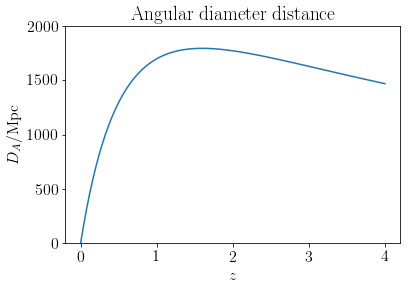

In [8]:
ztab = np.linspace(0,4,100)
DA = results.angular_diameter_distance(ztab)
plt.plot(ztab, DA)
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')
plt.ylim([0,2000]);

#### Get matter power spectrum using linear model or Halofit

In [9]:
#Get matter power spectrum at some redshift
pars.set_matter_power(redshifts=[0.5], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results.calc_power_spectra(pars)
kh, z, pk = \
         results.get_matter_power_spectrum(minkh=1e-4, maxkh=2, npoints = 200)

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = \
        results.get_matter_power_spectrum(minkh=1e-4, maxkh=2, npoints = 200)

#### Construct interpolating function for the linear case

In [10]:
Pk = interp1d(kh, pk)

#### Plot

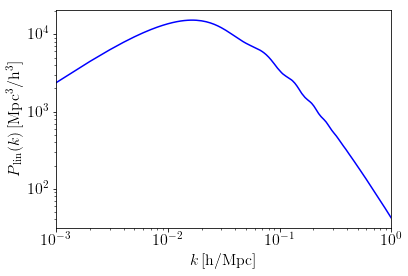

In [11]:
kminn=1e-3
kmaxx=1

k1 = np.linspace(kminn,kmaxx,1000)

plin = [Pk(k) for k in k1]

plt.loglog(k1,plin,color='blue')

plt.xlim(kminn,kmaxx)

plt.xlabel("$k \, \mathrm{[h/Mpc]}$")
plt.ylabel("$P_{\, \mathrm{lin}}(k) \, \mathrm{[Mpc^3/h^3]}$")

plt.show()

#### Exercise: 

Plot the non-linear (HALOFIT) power spectrum and compare it to the linear one.

#### Tonale 2018